# Phase Diagrams

Remember that we're dealing with second order differential equations, so every general solution needs two arbitrary constants.  We find these constants using the initial conditions, $x(0), \dot{x}(0)$, so we can think of every specific solution as being described by thse two numbers -- different initial conidtions will lead to different kinds of motion.

We can take this idea a bit further by thinking of $x(t)$ and $\dot{x}(t)$ as <i>parameteric</i> equations describing the function
$$
\dot{x} = \dot{x}(x).
$$
A plot of $\dot{x}(x)$ is called a *phase diagram*, and each unique initial condition will lead to a different trajectory in *phase space,* a two dimensional space made of the velocity and position of the object.  We've been looking only at one dimensional motion, so our phase space is two dimensional, but for one object in actuall three dimensional space, phase space would be 6D (three for position and three for velocity).  It can even more complicated -- with $n$ particles (or $n$ degrees of freedom) the phase space would be $6n$-dimensional.  Luckily we won't worry about that here.

## The Simple Harmonic Oscillator

The solution to the undamped spring, in the phase-shifted cosine form, is
$$
x(t) = A \cos (\omega_0 t - \delta),
$$
and the velocity is
$$
\dot{x}(t) = -\omega_0 A \sin(\omega_0 t - \delta).
$$
What are the values of $A$ and $\delta$?  Well, we find them via initial conditions, so take those to be
$$
x(0) = x_0 \quad \quad \text{and} \quad \quad \dot{x}(0) = v_0.
$$
With a little work, you can show that our constants are calculated by
$$
\delta = \tan^{-1} \left( \frac{v_0}{\omega_0 x_0} \right)
$$
and
$$
A= \frac{x_0}{\cos(\delta)}.
$$

Okay, now we're ready to make a phase diagram for the harmonic oscillator, but we'll start with a simple plot of $x(t)$ just to make sure we're on the right track.

<IPython.core.display.Javascript object>


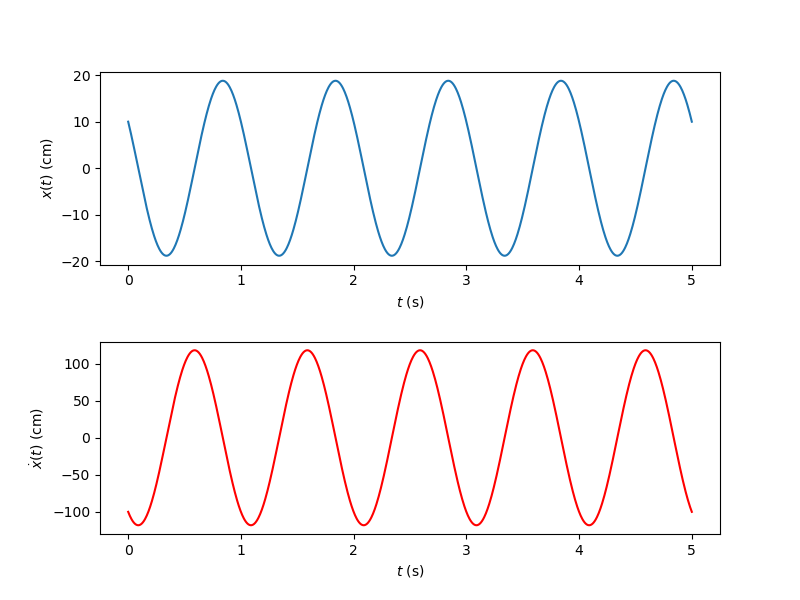

Text(0, 0.5, '$\\dot{x}(t)$ (cm)')

In [36]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# physical parameters
omega0 = 2*np.pi
tau = 2*np.pi / omega0

# define one big function to calculate x and xdot based on the ICs
def phase(t, x0, v0):
    d = np.arctan2(v0, omega0 * x0)
    A = x0 / np.cos(d)
    return A * np.cos(omega0 * t - d), -omega0 * A * np.sin(omega0 * t - d)

# ICs
x0 = 10.0
v0 = -100.0

# plot the motion just to check
t = np.linspace(0, 5*tau, 1000)
x, xdot = phase(t, x0, v0)

fig = plt.figure(figsize=(8,6))
plt.subplots_adjust(hspace=0.4)
ax = fig.add_subplot(2,1,1)
ax.plot(t, x)
ax.set_xlabel(r"$t$ (s)")
ax.set_ylabel(r"$x(t)$ (cm)")

ax = fig.add_subplot(2,1,2)
ax.plot(t, xdot, color='red')
ax.set_xlabel(r"$t$ (s)")
ax.set_ylabel(r"$\dot{x}(t)$ (cm)")

Now let's do the phase plot:

<IPython.core.display.Javascript object>


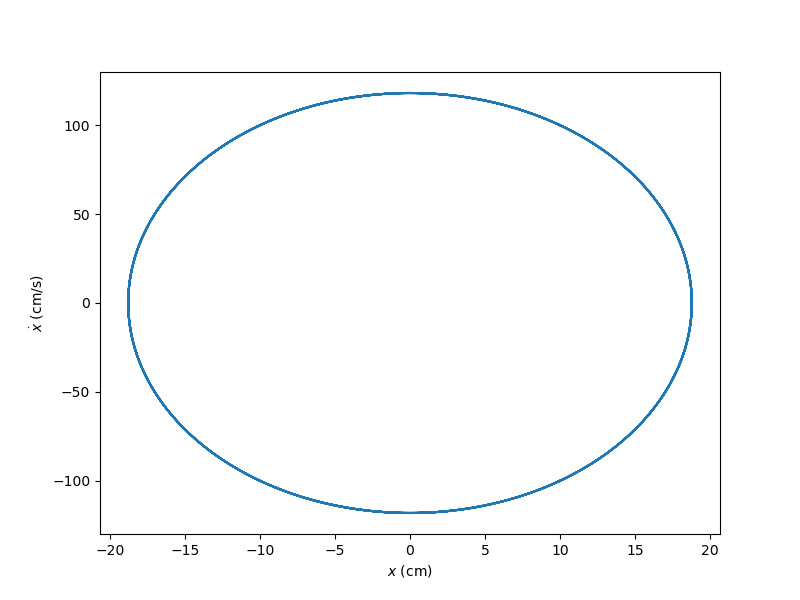

Text(0, 0.5, '$\\dot{x}$ (cm/s)')

In [37]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.plot(x, xdot)
ax.set_xlabel(r"$x$ (cm)")
ax.set_ylabel(r"$\dot{x}$ (cm/s)")

So, the phase plot looks like an ellipse (and is one!).  What does that mean, exactly?  Remember, the object traces out this trajectory as it oscillates; it might be better to see that if we can animate the trajectory.

<IPython.core.display.Javascript object>


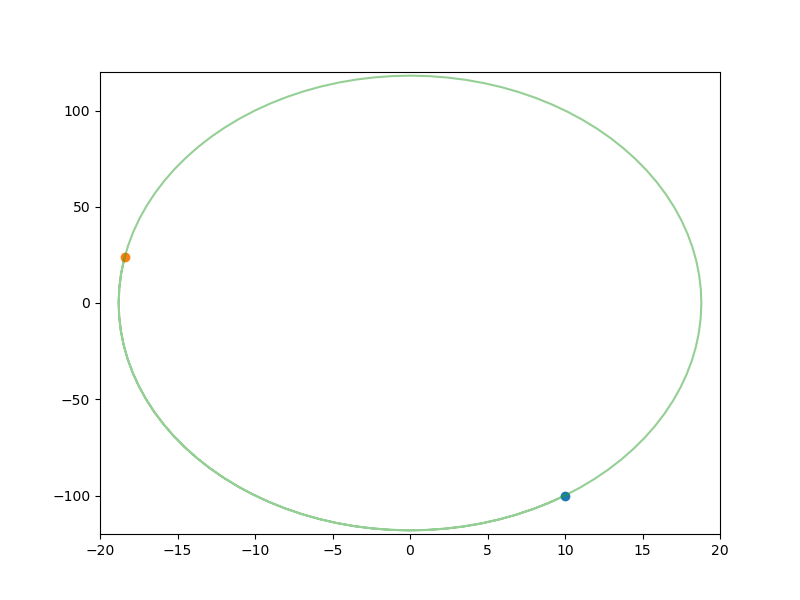

In [56]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlim(-20, 20)
ax.set_ylim(-120, 120)

ax.plot(x[0], xdot[0], 'o')
line1, = ax.plot(x[0], xdot[0], 'o')
line2, = ax.plot(x[0], xdot[0], '-', alpha = 0.5)

def update(t):
    times = np.arange(0, t, 0.01)
    x, xdot = phase(times, x0, v0)
    line2.set_data(x, xdot)
    x, xdot = phase(t, x0, v0)
    line1.set_data(x, xdot)
    return line,

anim = animation.FuncAnimation(fig, update, t, interval=50)

#anim.save('basic_animation.mp4', fps=10, extra_args=['-vcodec', 'libx264'])

plt.show()


What about different initial condition?  We'll skip the cool animation this time, but let's see what the phse plots look like.

<IPython.core.display.Javascript object>


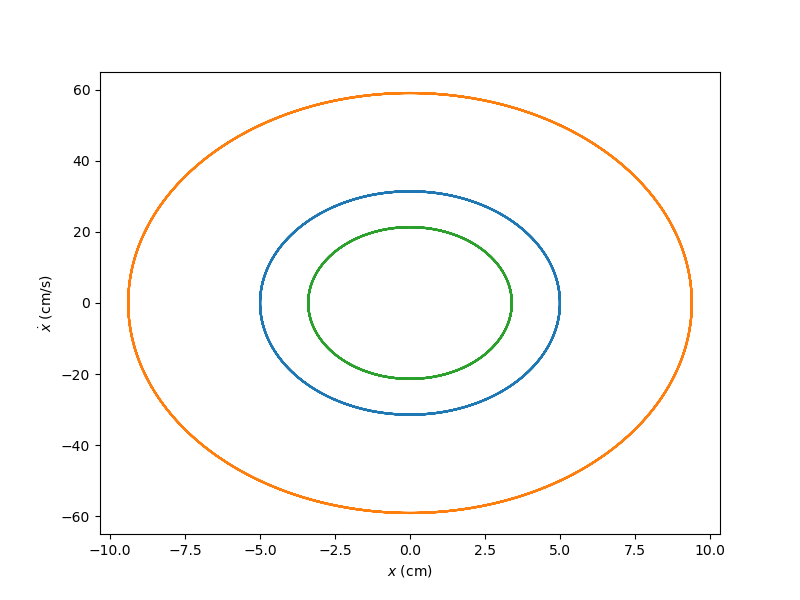

Text(0, 0.5, '$\\dot{x}$ (cm/s)')

In [70]:
# do this the long way for now

t = np.linspace(0, 5*tau, 1000)


fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
x, xdot = phase(t, 5, 0)
ax.plot(x, xdot)
x, xdot = phase(t, 5, -50)
ax.plot(x, xdot)
x, xdot = phase(t, 3, 10)
ax.plot(x, xdot)
ax.set_xlabel(r"$x$ (cm)")
ax.set_ylabel(r"$\dot{x}$ (cm/s)")

So, they're all ellipses of different sizes.  Neat!

## Damped Oscillations

Okay, let's move on the damped oscillations.  Same deal as above, but now we have to deal with weak, strong, and critical damped separately; I'll just do weak and strong here, and you can try critical on your own.

### Weakly Damped Oscillations

The position and velocity are
$$
x(t) = A e^{-\beta t} \cos(\omega_1 t - \delta)
$$
and
$$
\dot{x} (t) = -A e^{-\beta t} [ \beta \cos(\omega_1 t - \delta) + \omega_1 \sin(\omega_1 t - \delta) ].
$$
To keep things simple, I'll specify the constants $A$ and $\delta$ rather than the initial conditions, but each choice of $A$ and $\delta$ correspond to a specific set of initial conditions, so it doesn't really matter.

<IPython.core.display.Javascript object>


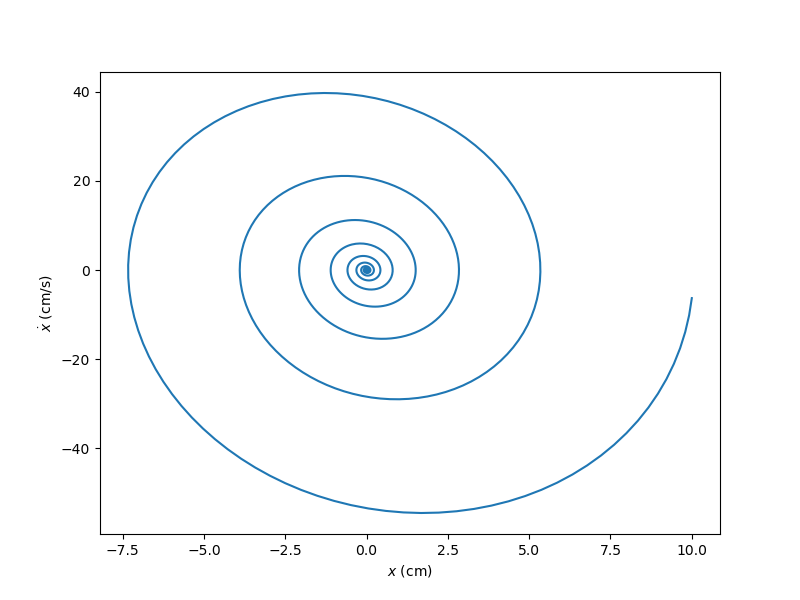

Text(0, 0.5, '$\\dot{x}$ (cm/s)')

In [74]:
# physical parameters
omega0 = 2*np.pi
tau = 2*np.pi / omega0
beta = 0.1 * omega0
omega1 = np.sqrt(omega0**2 - beta**2)


# define one big function to calculate x and xdot based on the ICs
def phase_weak(t, A, d):    
    return A * np.exp(-beta * t) * np.cos(omega1 * t - d), -A * np.exp(-beta*t) * ( beta * np.cos(omega1 * t - d) + omega1 * np.sin(omega1*t - d)  )

t = np.linspace(0, 10*tau, 1000)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
x, xdot = phase_weak(t, 10, 0)
ax.plot(x, xdot)
ax.set_xlabel(r"$x$ (cm)")
ax.set_ylabel(r"$\dot{x}$ (cm/s)")

Well, that's interesting.  This shape is called a *logarithmic spiral* -- the object decreases it oscillations until it reaches the "attractor" at $x = 0, \dot{x} = 0$.  Let's try a few more initial conditions.

<IPython.core.display.Javascript object>


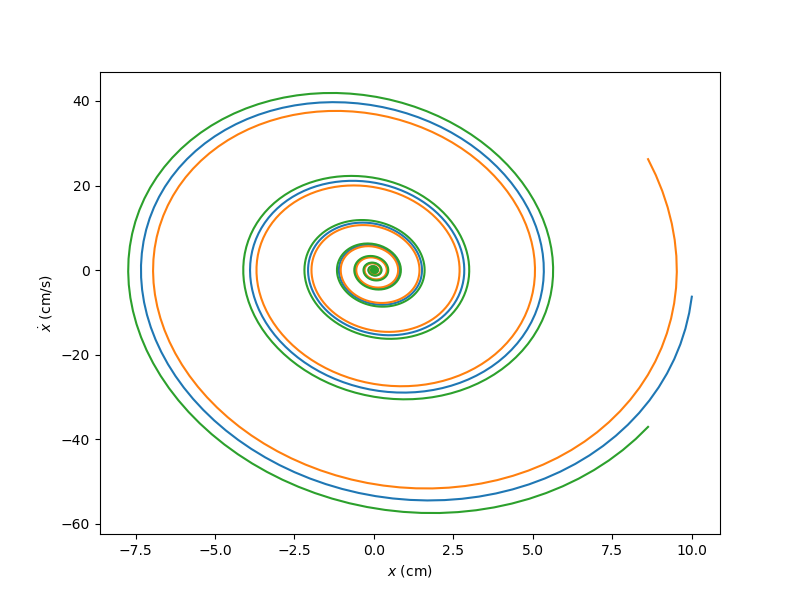

Text(0, 0.5, '$\\dot{x}$ (cm/s)')

In [78]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
x, xdot = phase_weak(t, 10, 0)
ax.plot(x, xdot)
x, xdot = phase_weak(t, 10, -100)
ax.plot(x, xdot)
x, xdot = phase_weak(t, 10, 100)
ax.plot(x, xdot)
ax.set_xlabel(r"$x$ (cm)")
ax.set_ylabel(r"$\dot{x}$ (cm/s)")

Notice that none of the trajectories in phase space *cross* -- that's always the case, since if they do it implies that one sets of initial conditions (at the crossing point) could produce two different trajectories.

### Strongly Damped Oscillations

Finally, I'll do strongly damped.  The equations are
$$
x(t) = C_1 e^{-\beta_- t} + C_2 e^{-\beta_+ t}
$$
and
$$
\dot{x}(t) = -\beta_- C_1 e^{-\beta_- t} - \beta_+ C_2 e^{-\beta_+ t},
$$
where
$$
\beta_\pm = \beta \pm \sqrt{\beta^2 - \omega0^2}.
$$

<IPython.core.display.Javascript object>


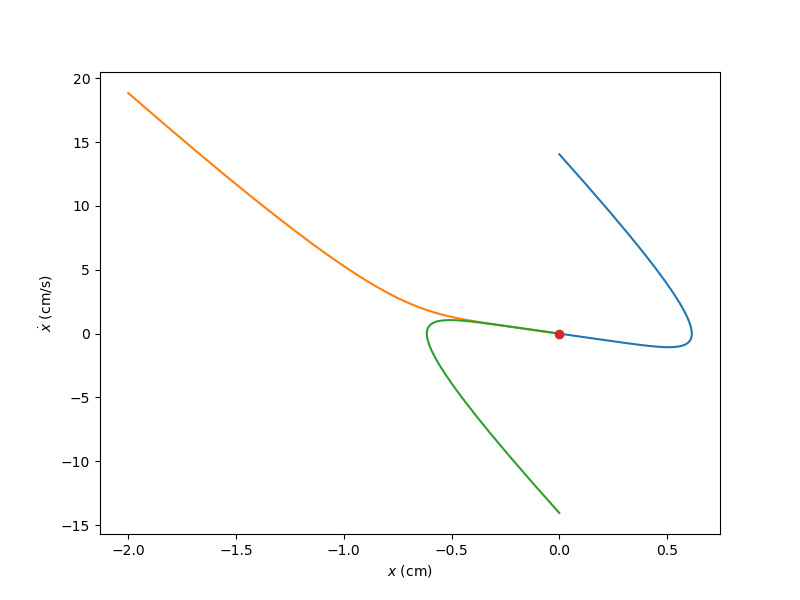

Text(0, 0.5, '$\\dot{x}$ (cm/s)')

In [92]:
# physical parameters
omega0 = 2*np.pi
tau = 2*np.pi / omega0
beta = 1.5 * omega0
betaplus = beta + np.sqrt(beta**2 - omega0**2)
betaminus = beta - np.sqrt(beta**2 - omega0**2)

# define one big function to calculate x and xdot based on the ICs
def phase_strong(t, C1, C2):    
    return C1 * np.exp(-betaminus * t) + C2 * np.exp(-betaplus * t), -betaminus * C1 * np.exp(-betaminus * t) - betaplus * C2 * np.exp(-betaplus * t) 

t = np.linspace(0, 10*tau, 1000)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
x, xdot = phase_strong(t, 1, -1)
ax.plot(x, xdot)
x, xdot = phase_strong(t, -1, -1)
ax.plot(x, xdot)
x, xdot = phase_strong(t, -1, 1)
ax.plot(x, xdot)
ax.plot(0, 0, 'o')
ax.set_xlabel(r"$x$ (cm)")
ax.set_ylabel(r"$\dot{x}$ (cm/s)")